# SVM on Pima Indians Diabetes Data Set

数据说明：
Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集） 根据现有的医疗信息预测5年内皮马印第安人糖尿病发作的概率。   

数据集共9个字段: 
0列为怀孕次数；
1列为口服葡萄糖耐量试验中2小时后的血浆葡萄糖浓度；
2列为舒张压（单位:mm Hg）
3列为三头肌皮褶厚度（单位：mm）
4列为餐后血清胰岛素（单位:mm）
5列为体重指数（体重（公斤）/ 身高（米）^2）
6列为糖尿病家系作用
7列为年龄
8列为分类变量（0或1）

数据链接：https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

In [33]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
from sklearn.metrics import log_loss  

#SVM并不能直接输出各类的概率，所以在这个例子中我们用正确率作为模型预测性能的度量
from sklearn.metrics import accuracy_score

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

## 读取数据 

In [55]:
#input data
train = pd.read_csv("pima-indians-diabetes.csv")

## 数据预处理

In [56]:
#  get labels
y_train = train['Target']   
X_train = train.drop(["Target"], axis=1)

In [57]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)

## 模型训练

### RBF核SVM正则参数调优

RBF核是SVM最常用的核函数。
RBF核SVM 的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和核函数的宽度gamma
C越小，决策边界越平滑； 
gamma越小，决策边界越平滑。

采用交叉验证，网格搜索步骤与Logistic回归正则参数处理类似，在此略。

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gammas = [0.0001,0.001, 0.01, 0.1, 1]
#gammas =[1e-5, 1e-6]
param_grid = {'C': Cs, 'gamma' : gammas}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

0.77734375
{'C': 1, 'gamma': 0.01}


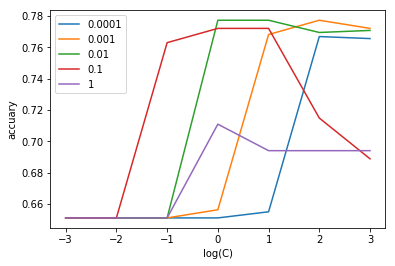

In [59]:
print(grid.best_score_)
print(grid.best_params_)

# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]

# plot results
n_Cs = len(Cs)
number_gamms = len(gammas)

test_scores =  np.array(test_means).reshape(n_Cs,number_gamms)
#train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_gamms)
#train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(gammas):
    pyplot.plot(x_axis, test_scores[:,i], label= gammas[i])
    #pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = gammas[i] )
    #pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuary' )
pyplot.savefig('SVMGridSearchCV_C.png' )

pyplot.show()

In [49]:
#grid.cv_results_

{'mean_fit_time': array([ 0.00929422,  0.00880179,  0.00872302,  0.00773058,  0.0073813 ,
         0.01213541,  0.00654421,  0.00684462,  0.00668898,  0.00694637,
         0.00872684,  0.01060858,  0.01204143,  0.00670204,  0.00705686,
         0.00732565,  0.00671263,  0.00880923,  0.0115438 ,  0.01341858,
         0.00813842,  0.00667672,  0.00606756,  0.00627422,  0.01132584,
         0.01226501,  0.01477094,  0.00921602,  0.00686383,  0.00704412,
         0.01002245,  0.01419225,  0.01624956,  0.01766324,  0.01238279,
         0.00680823,  0.01115603,  0.02583361,  0.01281443,  0.01543365,
         0.01842556,  0.01306052,  0.01203942,  0.0503366 ,  0.0848351 ,
         0.01438785,  0.01712899,  0.01782637,  0.01235118]),
 'mean_score_time': array([ 0.00214081,  0.00198579,  0.00194097,  0.00171418,  0.00167575,
         0.00286732,  0.00133104,  0.00157037,  0.0014854 ,  0.00154104,
         0.00194302,  0.00222321,  0.00248494,  0.00129418,  0.00147762,
         0.00162129,  0.00

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4] ,
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# 调用 GridSearchCV，将 SVC(), tuned_parameters, cv=5, 还有 scoring 传递进去，
grid = GridSearchCV(SVC(), tuned_parameters, cv=5,n_jobs = -1)

# 用训练集训练这个学习器 clf
grid.fit(X_train, y_train)

#grid.cv_results_

# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ][0:20]
test_stds = grid.cv_results_[ 'std_test_score' ][0:20]

# plot results
Cs =  [1, 10, 100, 1000]
gammas = np.logspace(-2, 2, 5) 
n_Cs = 4
number_gamms = 5
test_scores =  np.array(test_means).reshape(n_Cs,number_gamms)
#train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_gamms)
#train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(gammas):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = gammas[i] )
    #pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( 'accuary' )
pyplot.savefig('SVMGridSearchCV_C.png' )

pyplot.show()